## Loading Libraries

In [6]:
library(kernlab)
library(randomForest)
library(ellipse)
library(caret)

## Loading dataset

In [10]:
data(iris)
dataset <- iris

## Creating validation dataset

### create a list of 80% of the rows in the original dataset we can use for training

In [11]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

### select 20% of the data for validation

In [12]:
validation <- dataset[-validation_index,]

### use the remaining 80% of data to training and testing the models

In [13]:
dataset <- dataset[validation_index,]

## Summarizing the dataset 

### dimensions of dataset

In [14]:
dim(dataset)

[1] 120   5

### list types for each attribute

In [15]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### take a peek at the first 5 rows of the data

In [16]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### list the levels for the class

In [17]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### summarize the class distribution

In [21]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### summarize attribute distributions

In [22]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.700   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.838   Mean   :3.035   Mean   :3.761   Mean   :1.192  
 3rd Qu.:6.425   3rd Qu.:3.225   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.200   Max.   :6.900   Max.   :2.400  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

## Visualize Dataset

### Creating Univariate plots

### split input and output

In [23]:
x <- dataset[,1:4]
y <- dataset[,5]

### boxplot for each attribute on one image

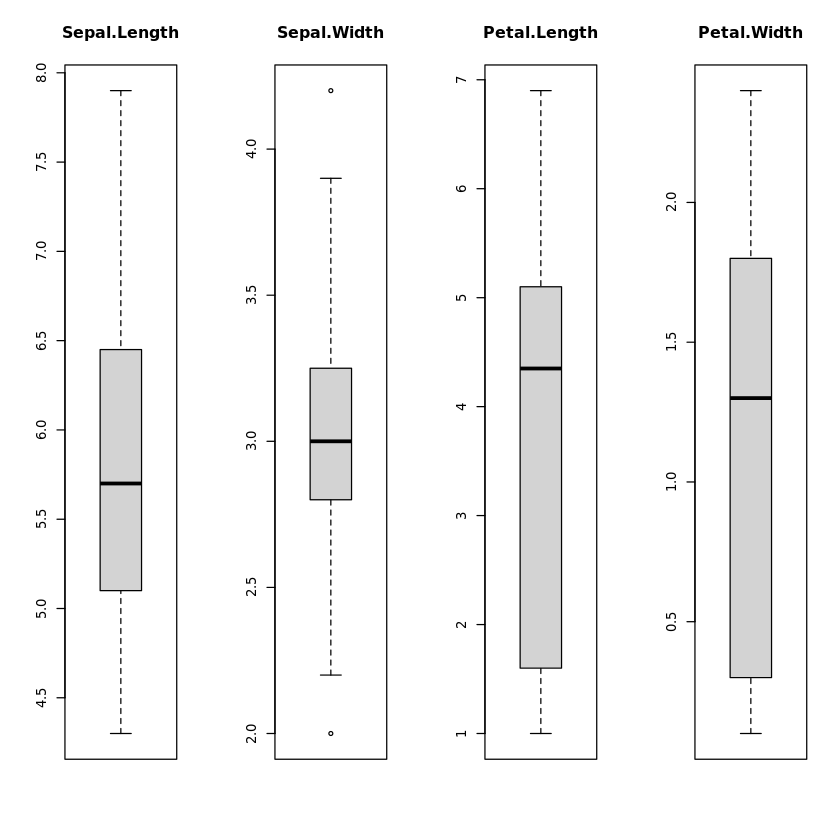

In [24]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

### barplot for class breakdown

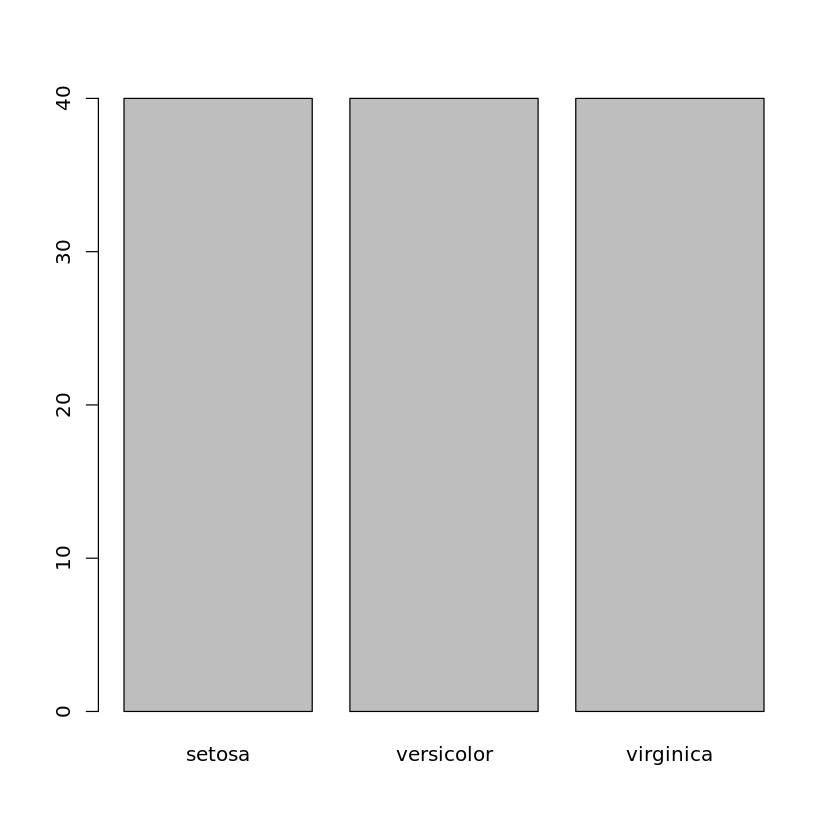

In [25]:
plot(y)

### Creating Multivariate plots

### scatterplot matrix

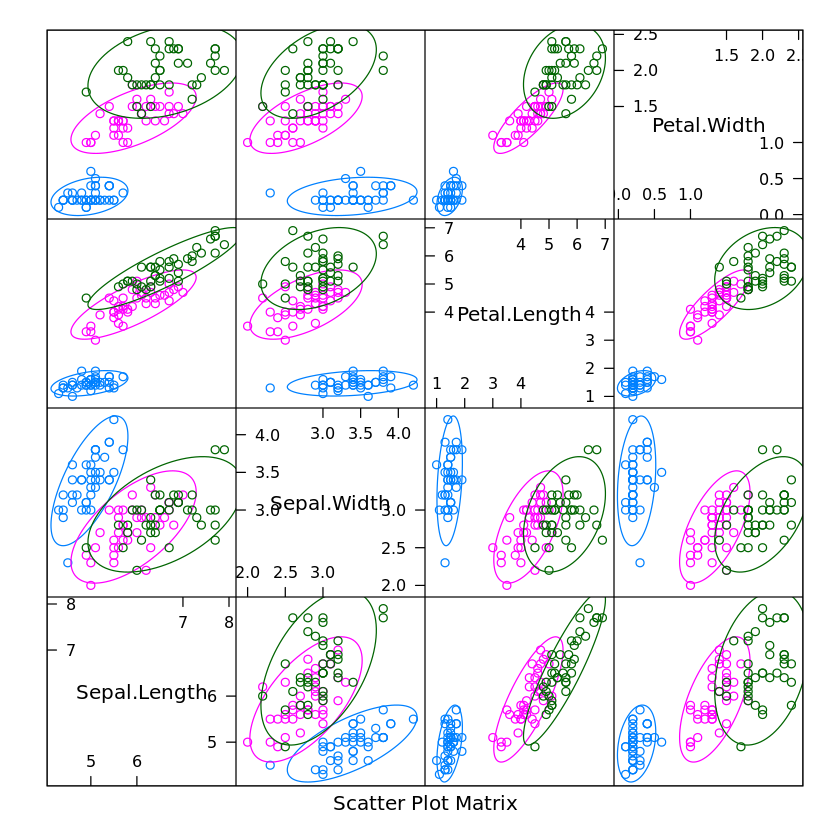

In [26]:
featurePlot(x=x, y=y, plot="ellipse")

### box and whisker plots for each attribute

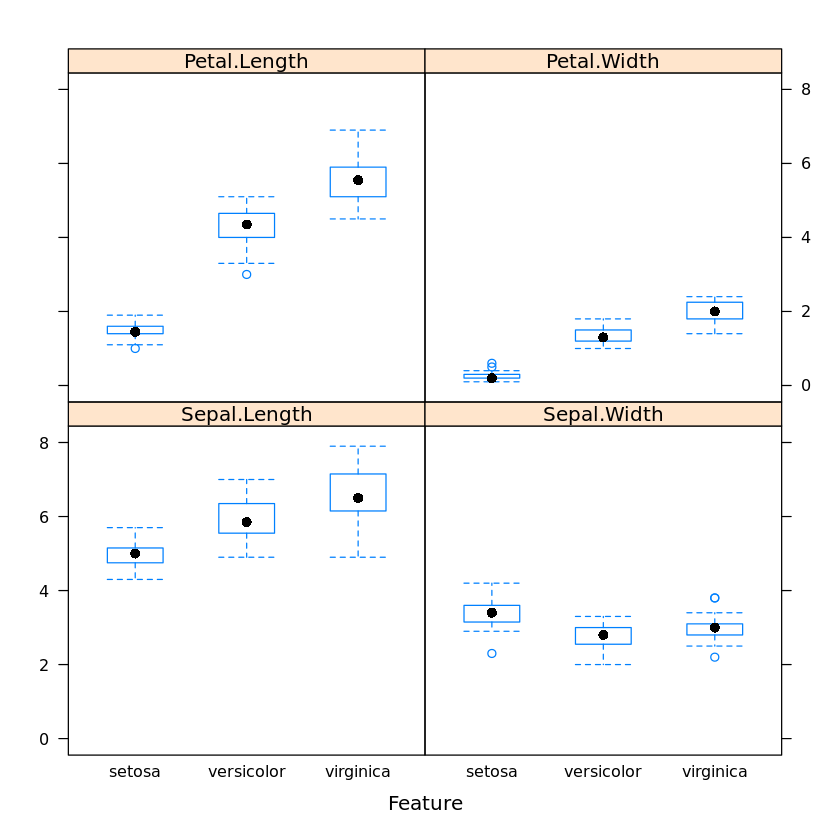

In [27]:
featurePlot(x=x, y=y, plot="box")

### density plots for each attribute by class value

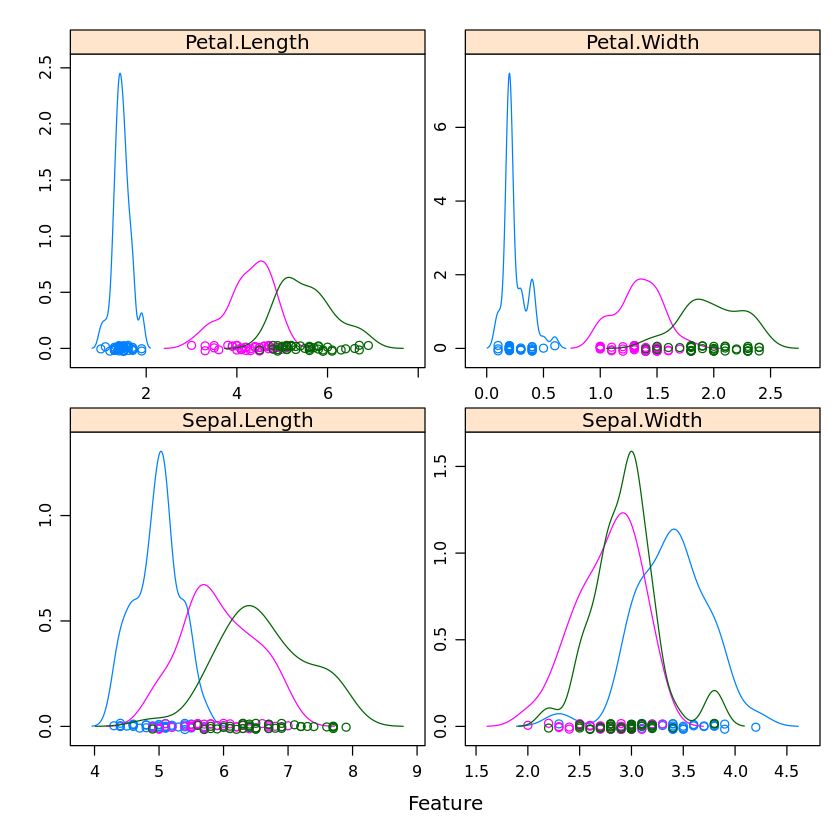

In [28]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## Evaluate Some Algorithms

### Run algorithms using 10-fold cross validation

In [29]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Building models

### a) linear algorithms

In [30]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

### b) nonlinear algorithms

### CART

In [31]:
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

### kNN

In [32]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

### c) advanced algorithms

### SVM

In [33]:
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

### Random Forest

In [34]:
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [ ]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)